In [2]:
import io
import glob
import cv2
import PIL.Image
import numpy as np

from natsort import natsorted
from matplotlib import pyplot as plt
from matplotlib import figure
from util.WordSegmentation import wordSegmentation, prepareImg
from IPython.display import clear_output, Image, display
from skimage.morphology import skeletonize
from skimage.filters import threshold_otsu
from skimage import util

In [7]:
input_files = 'output_files//image-data/'

In [8]:
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

In [9]:
def load_slices(filepath):
    slices = []
    slices_filepath = filepath + '/'
    slices_path = natsorted(glob.glob(slices_filepath + 'slice*_binarize.png'))
    for slice_path in slices_path:
        slices.append(prepareImg(cv2.imread(slice_path), 50))  
    return slices

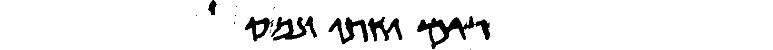

In [10]:
image_filepaths = glob.glob(input_files + '*')
images = []
for image_filepath in image_filepaths:
    images.append(load_slices(image_filepath))

showarray(images[15][2])

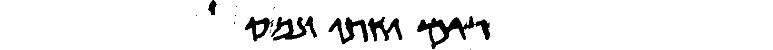

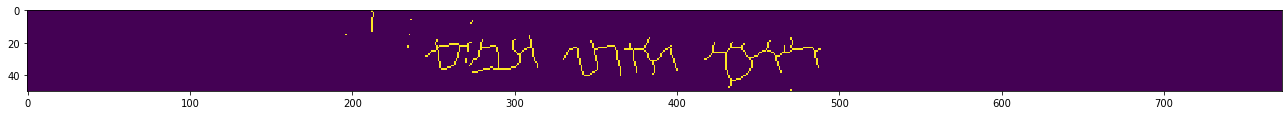

In [11]:
# temp = images[15][2].astype('uint8')
# temp = cv2.bitwise_not(temp)
temp = images[15][2]
#temp = binarize(temp)

global_thresh = threshold_otsu(temp)
binary_global = temp > global_thresh
binary_global = util.invert(binary_global)

temp = skeletonize(binary_global)

showarray(images[15][2])
binarized_temp = temp.astype(int)

fig, ax = plt.subplots(figsize=(18, 2))
ax.imshow(temp, interpolation='nearest')
plt.tight_layout()

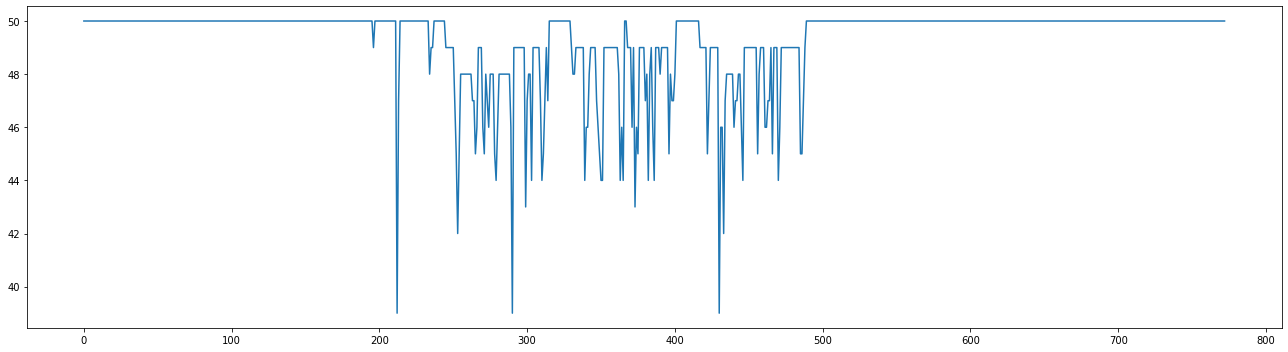

In [12]:
h, w = binarized_temp.shape
# print(h, w)
# print(len(erosion[0]))
# print(len(erosion[:][2]))
# print(erosion[:][0])

histogram = np.zeros((w,), dtype=int)
for idx0, vertical_line in enumerate(binarized_temp[:]):
    for idx1, value in enumerate(vertical_line):
        if value < 1:
            histogram[idx1] += 1
plt.figure(figsize=(18, 5))
plt.plot(histogram)
plt.tight_layout()